# Group Geoffroy Dufay, Louis Lapassat: diabete

In [1]:
#########################
### loading libraries ###
#########################

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

##############################
### fixing some parameters ###
##############################

sns.set(style="darkgrid", palette="muted", font_scale=1.5)
random_seed = 141421

# Loading the dataset

In [186]:
diabete = datasets.load_diabetes() # normalize dataset
df = pd.DataFrame(data=diabete.data, columns=diabete.feature_names)
df['target'] = diabete.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline. 

**Note**: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1). For instance if `f` is a feature we have:

$$ \frac{f - mean(f)}{std(f)} \times n\_samples$$ 

For this dataset one of the best result was $mse = 0.51$ and $r_2 = 0.47$ with relatively equivalent performance for SVR, Ridge, Lasso, Linear Regression.

In [217]:
df = pd.read_csv('diabetes.data', sep='\t') # original dataset
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


### Feature: Age

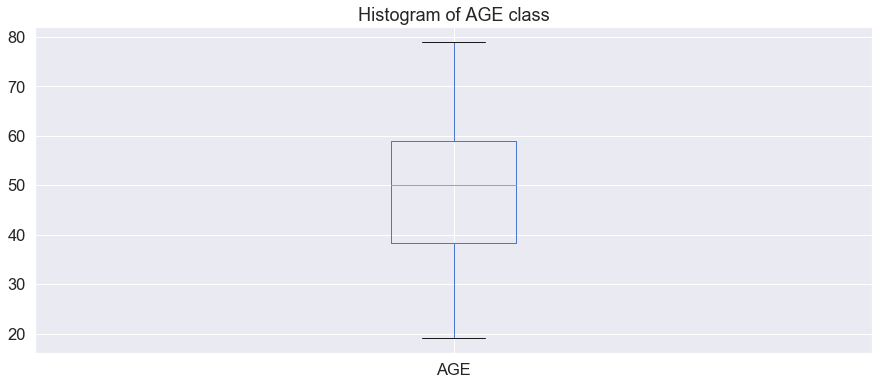

In [219]:
plt.figure(figsize=(15,6))
plt.title('Boxplot of AGE')
df['AGE'].plot(kind='box')
plt.show()

Here we will regroup the `AGE` by class according to: https://www.statcan.gc.ca/fra/concepts/definitions/age2. Hence we have the following class:

 * Kid 1: 0 $\leq$ `AGE` $\leq$ 14
 * Teenager 2: 15 $\leq$ `AGE` $\leq$ 24
 * Adult 3: 25 $\leq$ `AGE` $\leq$ 64
 * Senior 4: 65 $\leq$ `AGE`

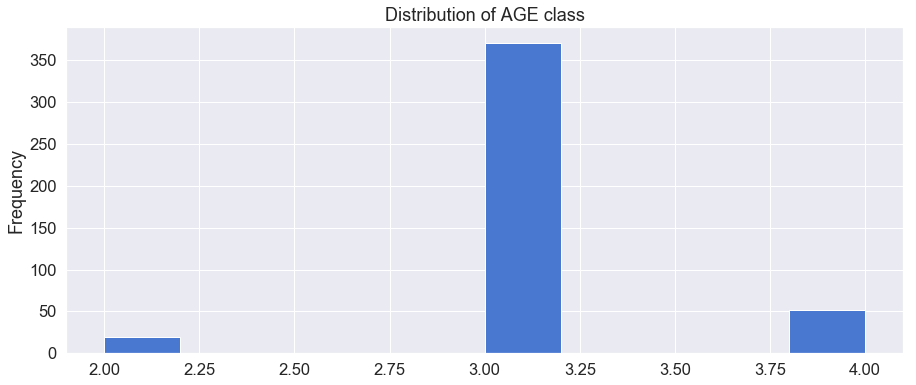

In [216]:
#####################
### AGE treatment ###
#####################

df['AGE'] = list(map(lambda x: 1 * (0 <= x <= 14) + 2 * (15 <= x <= 24) + 3 * (25 <= x <= 64) + 4 * (65 <= x), df['AGE']))

############
### plot ###
############

plt.figure(figsize=(15,6))
plt.title('Histogram of AGE class')
df['AGE'].plot(kind='hist')
plt.show()

The figure reveals that we have almost only adult in our dataset. It would be interesting to look at diabete papers for adults.

### Feature: Sex

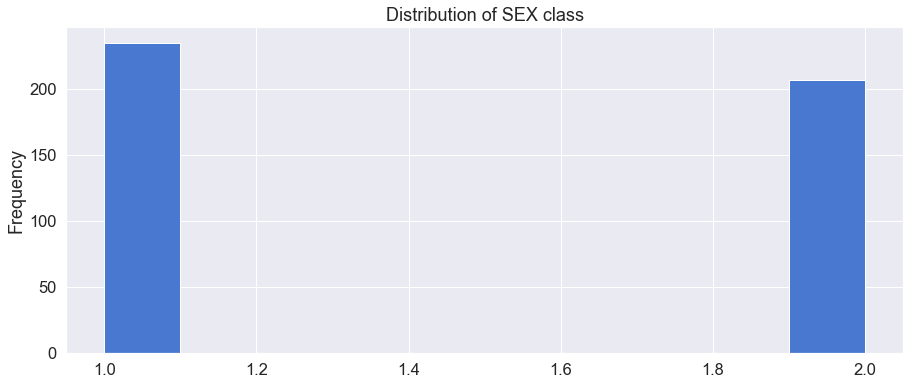

In [213]:
############
### plot ###
############

plt.figure(figsize=(15,6))
plt.title('Histogram of SEX class')
df['SEX'].plot(kind='hist')
plt.show()

The figure illustrates that we have pretty much the same density of male and female.

### Feature: BMI

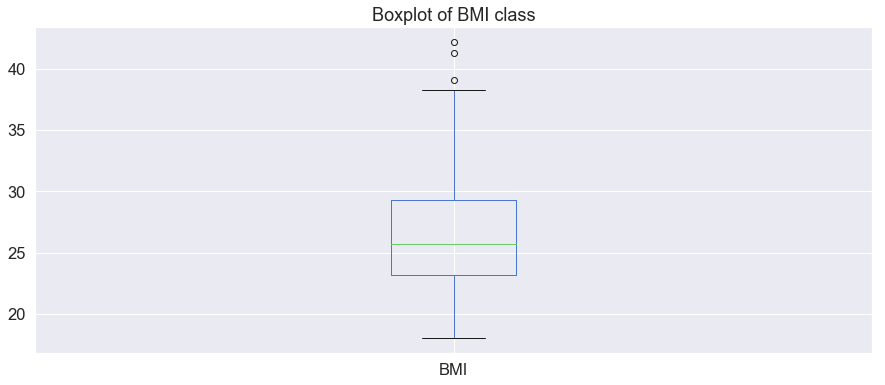

In [222]:
############
### plot ###
############

plt.figure(figsize=(15,6))
plt.title('Boxplot of BMI class')
df['BMI'].plot(kind='box')
plt.show()

To categorize this feature we will use: http://www.euro.who.int/en/health-topics/disease-prevention/nutrition/a-healthy-lifestyle/body-mass-index-bmi. Hence we have the following repartition:

 * Underweight 1: `BMI` $< 18.5$ 
 * Normal weight 2: $ 18.5 \leq $`BMI` $ \leq 24.9$ 
 * Pre-obesity 3: $ 18.5 \leq $`BMI` $ \leq 24.9$
 * Obesity class I 4: $ 18.5 \leq $`BMI` $ \leq 24.9$
 * Obesity class II 5: $ 18.5 \leq $`BMI` $ \leq 24.9$
 * Obesity class III 6: $ 18.5 \leq $`BMI` $ \leq 24.9$


# Some feature engineering

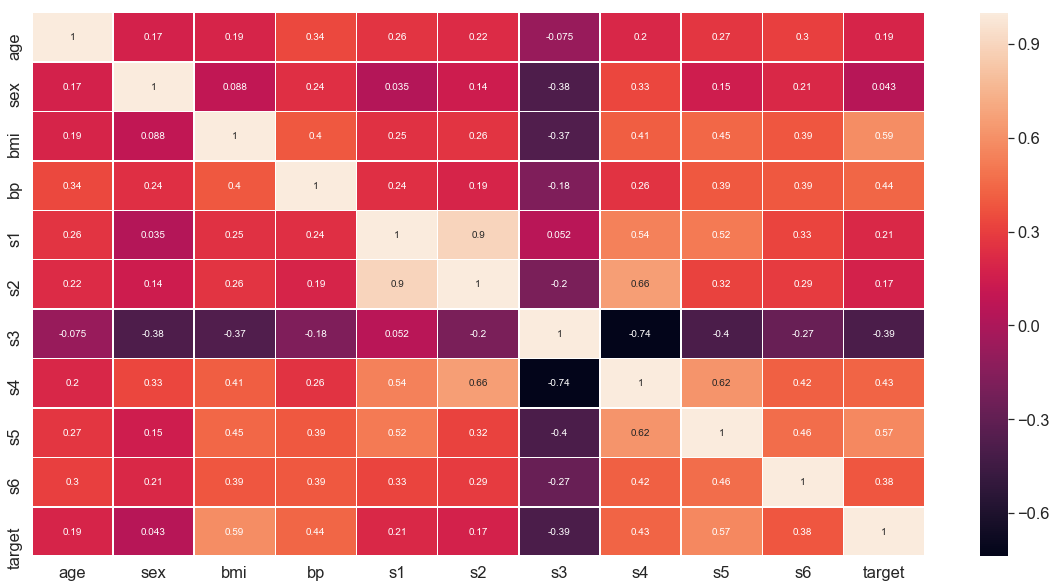

In [3]:
##########################
### correlation matrix ###
##########################

f,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5,ax=ax)
plt.show()

We can use this tool to reduce the features' size. For instance as `s1` and `s2` are highly correlated $\rho = 0.9$ we can use only one of these two to pursue. Also we can look at correlated features with the `target` (objective) class.

# RFECV method 

Here the aim is to create the "best" subset of features based on recursive feature elimination with a given model (as argument of the method). At the end we got the "best" subset of feature for the given model.

In [171]:
########################
### import libraries ###
########################

from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso

#################
### run RFECV ###
#################

rfecv = RFECV(estimator=Lasso(alpha=0.1), step=1, cv=4) # here change the model (import the model before!)
rfecv = rfecv.fit(df.drop('target', axis=1), df.target)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', list(df.drop('target', axis=1).columns[rfecv.support_]))

Optimal number of features : 29
Best features : ['bmi', 'bp', 's6', 'age**sex', 'age**s2', 'age**s5', 'sex**age', 'sex**sex', 'sex**bp', 'bmi**age', 'bmi**s4', 'bp**bmi', 'bp**s5', 'bp**s6', 's1**bp', 's1**s3', 's2**age', 's2**s3', 's2**s5', 's3**age', 's3**sex', 's3**bp', 's3**s2', 's3**s3', 's3**s5', 's5**bmi', 's5**s2', 's5**s3', 's5**s6']


We also tried to train/test with this method without particular improvment in the mean squared error... Hence we have decided to go on with all the dataset (all features) for the following models (see further below).

# Tune_Plot function that will test all our models

It uses a conbination of grid search CV to optimize on a set of parameters. The function works as follow:

 * Data normalization (feature, target) 
 * Iteration with GridSearchCV (just do GridSearchCV but n-time to improve stability of "best set of parameters")
 * Creat a new model with the "best set of parameters"
 * One test with train/test split dataset 
 * Multiple tests with different train/test dataset (average result)
 * Error distribution

To ensure that we can compare different models we set a random seed for every function call. Type `help(tune_plot)` for more information. See the conclusion at the bottom **Conclusion**.

In [116]:
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import BayesianRidge

from sklearn.model_selection import GridSearchCV
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
import itertools as it
import operator
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

def tune_plot(model, param, X, y, normalize=1, iter_gridsearch=1, nb_cv=5, test_size=0.3, seed=141421):
    
    """
    Tune a given model with GridSearchCV and give for accuracy results with a confusion matrix.
    
    First you need to make sure that you imported the library for your model!
    
    model = classificator
    param = parameters of your classificator that you want to tune 
    X = data for prediction (DataFrame pref)
    y = target to predict (DataFrame pref)
    normalize = True/False (normalize both X and y with StandardScaler and LabelEncoder)
    iter_gridsearch = number of iteration for GridSearchCV (can be usefull if your model involve randomness)
    nb_cv = number of cross validation
    test_size = test size in percent (splitting train and test set)
    seed = seed for random state
    """
    
    print(" ************************* ", str(model), " ************************* ")
    
    ######################
    ### Normalize data ###
    ######################
    
    if normalize:
        yy = (y - np.mean(y)) / np.std(y)
        scaler = StandardScaler()
        scaler.fit(X)
        XX = scaler.transform(X)
    else:
        yy = y
        XX = X
    
    ####################
    ### GridSearchCV ###
    ####################
    
            #######################################################
            ### creat a dictionary of all possible combinations ###
            #######################################################

    allNames = sorted(param)
    dic_comb = {key: 0 for key in it.product(*(param[Name] for Name in allNames))}

            ####################################
            ### iteration throw GridSearchCV ###
            ####################################

    for i in tqdm(range(iter_gridsearch)):
        result_grid_search = GridSearchCV(estimator=model(), param_grid=param, cv=nb_cv, return_train_score=False)
        result_grid_search.fit(XX, yy)
        dic_comb[tuple(result_grid_search.best_params_[Name] for Name in allNames)] += 1

            ############################################
            ### selecting the best set of parameters ###
            ############################################

    best_param = {key : value for key, value in zip(allNames, max(dic_comb.items(), key=operator.itemgetter(1))[0])} 
    
    print('best parameters: ', best_param)
    
    ####################
    ### update model ###
    ####################
    
    clf = model(**best_param)
    
    ########################
    ### train / test set ###
    ########################
    
    x_train, x_test, y_train, y_test = train_test_split(XX, yy, test_size=test_size, random_state=seed)
    
    #################
    ### fit model ###
    #################    
    
    clf.fit(x_train, y_train)
    
    #############
    ### Score ###
    #############
    print('\n')
    
    print("Mean squared error (on test set): %.2f" % mean_squared_error(y_test, clf.predict(x_test)))
    print('Variance score (max_value=1 for perfect prediction): %.2f' % r2_score(y_test, clf.predict(x_test)))
    
    #####################
    ### Average score ###
    #####################
    
    print('\n')
    mae = 0
    var = 0
    y_error = []
    n = 30
    for i in range(n):
        x_train, x_test, y_train, y_test = train_test_split(XX, yy, test_size=test_size, random_state=i)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        y_error.append(list(y_test.values - y_pred))
        mae += mean_squared_error(y_test, y_pred)
        var += r2_score(y_test, y_pred)
    print("Average Mean squared error: %.2f" %(mae / n))
    print('Average Variance score (max_value=1 for perfect prediction): %.2f' %(var / n))
    
    ##########################
    ### error distribution ###
    ##########################
    
    plt.figure(figsize=(15, 6))
    plt.title('Error distribution')
    sns.distplot(y_error[0])
    
    return best_param

# Test of the MLPRegressor with GridSearhCV

 *************************  <class 'sklearn.neural_network.multilayer_perceptron.MLPRegressor'>  ************************* 



best parameters:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (70,), 'solver': 'sgd'}


Mean squared error (on test set): 0.47
Variance score (max_value=1 for perfect prediction): 0.46


Average Mean squared error: 0.52
Average Variance score (max_value=1 for perfect prediction): 0.45


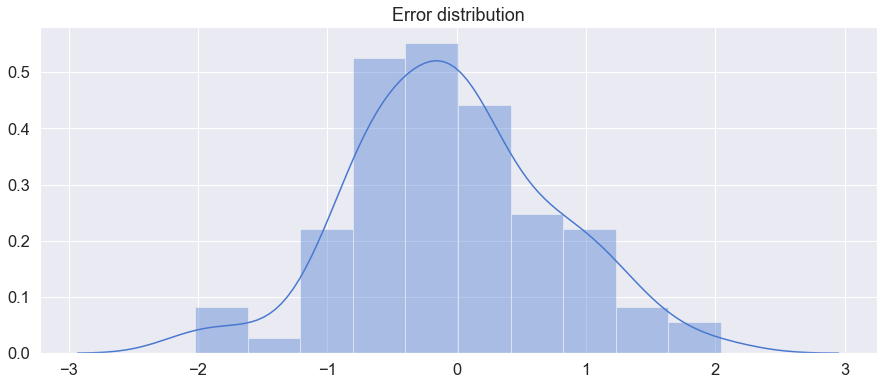

In [126]:
param = { 
    'hidden_layer_sizes' : [(70,), (75,), (80)], # (100,) is default
    'activation' : ['relu', 'tanh', 'identity'], # 'relu' is default
    'solver' : ['sgd'], # 'adam' is default
    'alpha' : [0.1] # 0.0001 is default
    }

best_param_MLP = tune_plot(MLPRegressor, param,
                          df.drop(['target'], axis=1), df['target'], normalize=True,
                          iter_gridsearch=10, nb_cv=3, test_size=0.2, seed=141421)

# Test of the SVR with GridSearhCV

 *************************  <class 'sklearn.svm.classes.SVR'>  ************************* 



best parameters:  {'gamma': 0.01, 'kernel': 'rbf'}


Mean squared error (on test set): 0.58
Variance score (max_value=1 for perfect prediction): 0.33


Average Mean squared error: 0.58
Average Variance score (max_value=1 for perfect prediction): 0.39


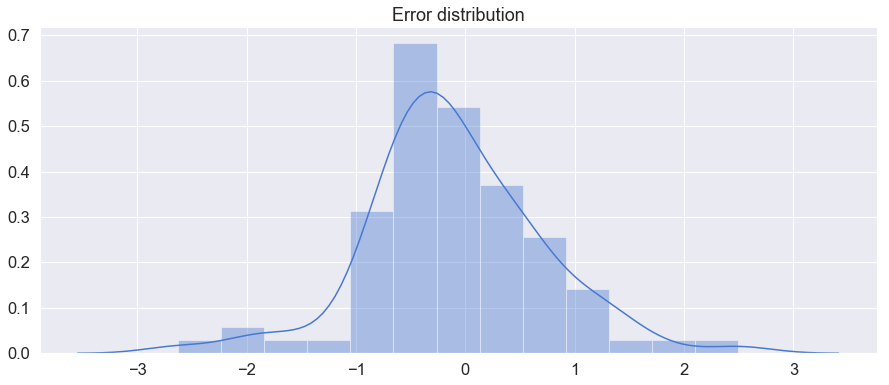

In [174]:
param = { 
    'kernel' : ['rbf', 'sigmoid'], # rbf is default
    'gamma' : [0.01, 0.1, 1] # auto is default
    }

best_param_MLP = tune_plot(SVR, param,
                          df.drop(['target'], axis=1), df['target'], normalize=True,
                          iter_gridsearch=10, nb_cv=3, test_size=0.2, seed=141421)

# Test of the Lasso with GridSearhCV

 *************************  <class 'sklearn.linear_model.coordinate_descent.Lasso'>  ************************* 



best parameters:  {'alpha': 0.01}


Mean squared error (on test set): 0.54
Variance score (max_value=1 for perfect prediction): 0.49


Average Mean squared error: 0.50
Average Variance score (max_value=1 for perfect prediction): 0.47


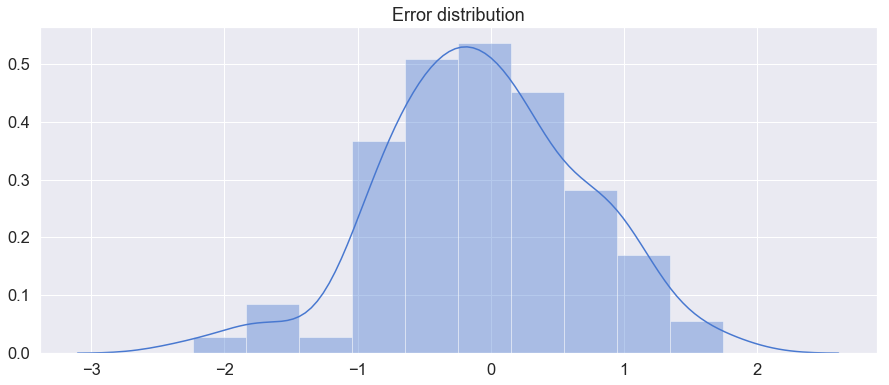

In [175]:
param = { 
    'alpha' : [0, 0.1, 0.01], # rbf is default
    }

best_param_MLP = tune_plot(Lasso, param,
                          df.drop(['target'], axis=1), df['target'], normalize=True,
                          iter_gridsearch=10, nb_cv=3, test_size=0.2, seed=11421)

# Test of the Ridge with GridSearhCV

 *************************  <class 'sklearn.linear_model.ridge.Ridge'>  ************************* 



best parameters:  {'alpha': 0.1}


Mean squared error (on test set): 0.63
Variance score (max_value=1 for perfect prediction): 0.28


Average Mean squared error: 0.64
Average Variance score (max_value=1 for perfect prediction): 0.32


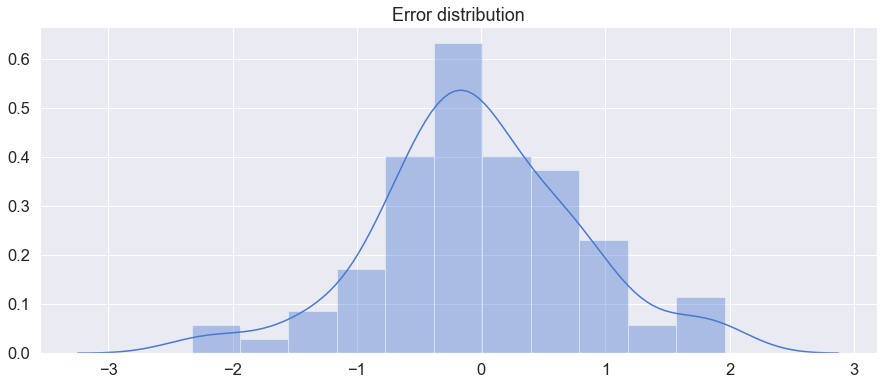

In [176]:
param = { 
    'alpha' : [0, 0.1, 0.01], # rbf is default
    }

best_param_MLP = tune_plot(Ridge, param,
                          df.drop(['target'], axis=1), df['target'], normalize=True,
                          iter_gridsearch=10, nb_cv=3, test_size=0.2, seed=141421)

# Test of the LinearRegression with GridSearhCV

 *************************  <class 'sklearn.linear_model.ridge.Ridge'>  ************************* 



best parameters:  {'fit_intercept': False}


Mean squared error (on test set): 0.55
Variance score (max_value=1 for perfect prediction): 0.37


Average Mean squared error: 0.56
Average Variance score (max_value=1 for perfect prediction): 0.40


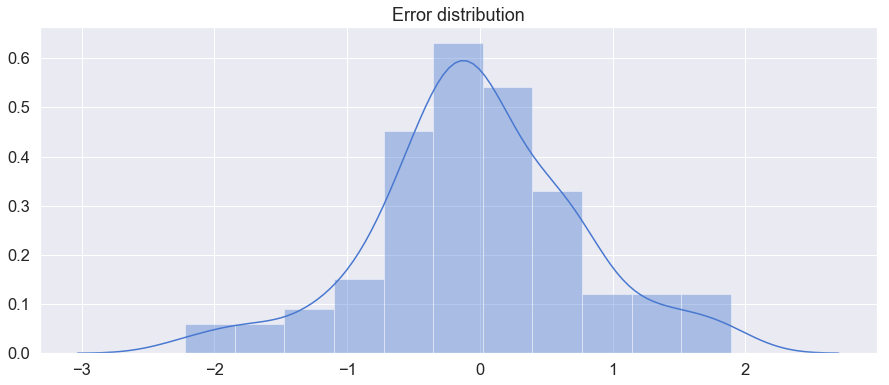

In [177]:
param = { 
    'fit_intercept' : [True, False], # rbf is default
    }

best_param_MLP = tune_plot(Ridge, param,
                          df.drop(['target'], axis=1), df['target'], normalize=True,
                          iter_gridsearch=10, nb_cv=3, test_size=0.2, seed=141421)

# Test of the GaussianProcessRegressor with GridSearhCV

 *************************  <class 'sklearn.gaussian_process.gpr.GaussianProcessRegressor'>  ************************* 



best parameters:  {'alpha': 0.01}


Mean squared error (on test set): 0.78
Variance score (max_value=1 for perfect prediction): 0.10


Average Mean squared error: 0.85
Average Variance score (max_value=1 for perfect prediction): 0.10


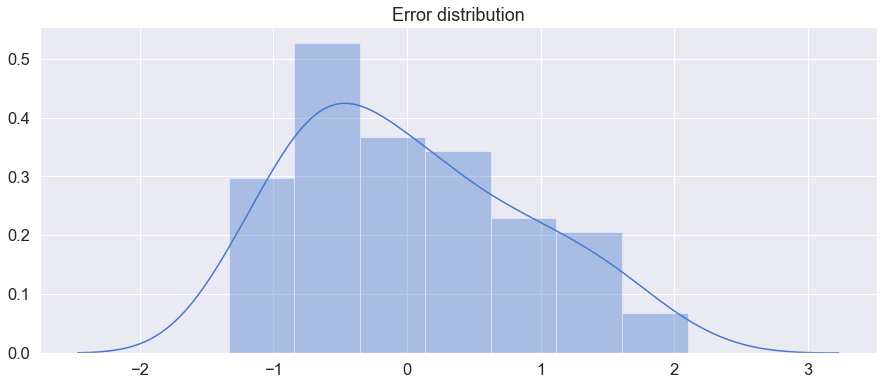

In [178]:
param = { 
    'alpha' : [1e-2, 1e-1, 1, 10] # 1e-10 is default
    }

best_param_MLP = tune_plot(GaussianProcessRegressor, param,
                          df.drop(['target'], axis=1), df['target'], normalize=True,
                          iter_gridsearch=10, nb_cv=3, test_size=0.2, seed=141421)

# Test of the GradientBoostingRegressor with GridSearhCV

 *************************  <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>  ************************* 



best parameters:  {'loss': 'lad'}


Mean squared error (on test set): 0.50
Variance score (max_value=1 for perfect prediction): 0.42


Average Mean squared error: 0.56
Average Variance score (max_value=1 for perfect prediction): 0.40


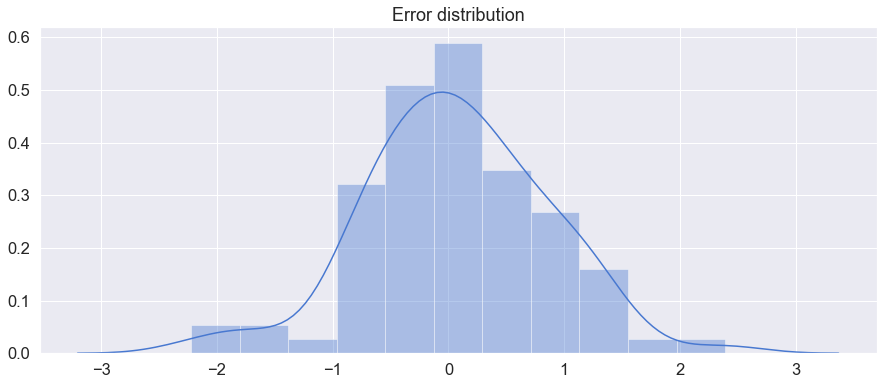

In [179]:
param = { 
    'loss' : ['ls', 'lad', 'huber', 'quantile'], # 1e-10 is default
    }

best_param_MLP = tune_plot(GradientBoostingRegressor, param,
                          df.drop(['target'], axis=1), df['target'], normalize=True,
                          iter_gridsearch=10, nb_cv=3, test_size=0.2, seed=141421)

# Test of the RandomForestRegressor with GridSearhCV

 *************************  <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>  ************************* 



best parameters:  {'max_depth': 3, 'n_estimators': 35}


Mean squared error (on test set): 0.48
Variance score (max_value=1 for perfect prediction): 0.45


Average Mean squared error: 0.55
Average Variance score (max_value=1 for perfect prediction): 0.42


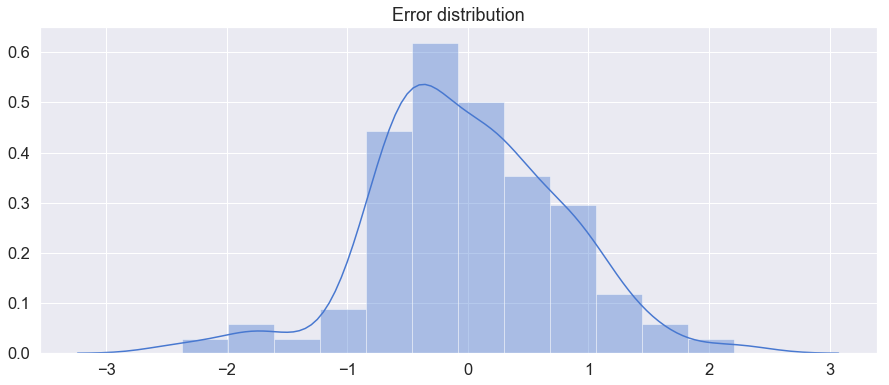

In [180]:
param = { 
    'n_estimators' : [20, 25, 30, 35], # 1e-10 is default
    'max_depth' : [3, 5, 7], # 2 is default
    }

best_param_MLP = tune_plot(GradientBoostingRegressor, param,
                          df.drop(['target'], axis=1), df['target'], normalize=True,
                          iter_gridsearch=10, nb_cv=3, test_size=0.2, seed=141421)

# Test of the Lars with GridSearhCV

 *************************  <class 'sklearn.linear_model.least_angle.Lars'>  ************************* 



best parameters:  {'fit_intercept': True, 'n_nonzero_coefs': 11, 'normalize': True}


Mean squared error (on test set): 2.64
Variance score (max_value=1 for perfect prediction): -2.05


Average Mean squared error: 0.96
Average Variance score (max_value=1 for perfect prediction): -0.02


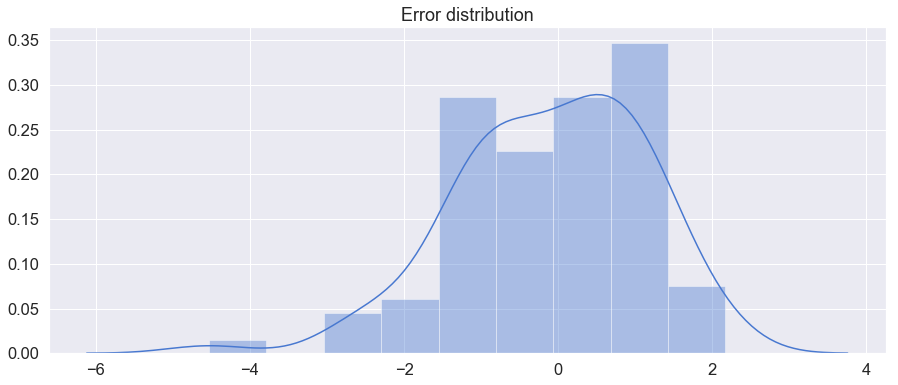

In [181]:
param = { 
    'n_nonzero_coefs' : [1, 3, 5, 7, 9, 11], 
    'normalize' : [True, False],
    'fit_intercept' : [True, False]
    }

best_param_MLP = tune_plot(Lars, param,
                          df.drop(['target'], axis=1), df['target'], normalize=True,
                          iter_gridsearch=10, nb_cv=3, test_size=0.2, seed=141421)

#  Test of the BayesianRidge with GridSearhCV

 *************************  <class 'sklearn.linear_model.bayes.BayesianRidge'>  ************************* 



best parameters:  {'alpha_1': 1e-06, 'alpha_2': 0.01, 'lambda_1': 0.01, 'lambda_2': 1e-06, 'n_iter': 50, 'tol': 0.0001}


Mean squared error (on test set): 0.47
Variance score (max_value=1 for perfect prediction): 0.46


Average Mean squared error: 0.49
Average Variance score (max_value=1 for perfect prediction): 0.48


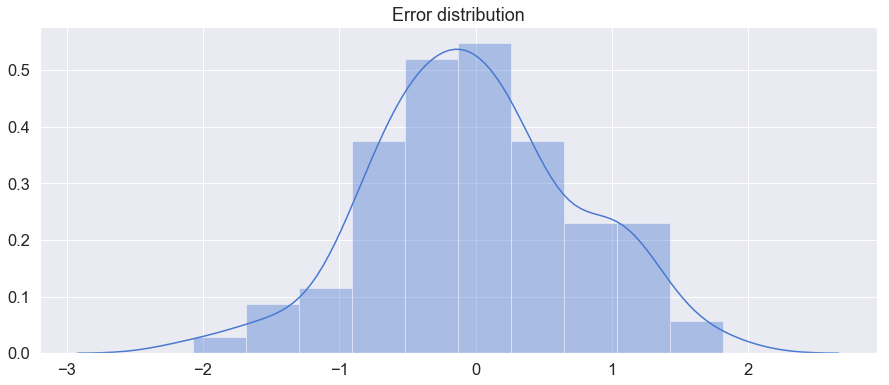

In [154]:
param = { 
    'n_iter' : [50, 100, 200], 
    'tol' : [0.001, 0.0001],
    'alpha_1' : [1e-06, 1e-04, 1e-02],
    'alpha_2' : [1e-06, 1e-04, 1e-02],
    'lambda_2' : [1e-06, 1e-04, 1e-02],
    'lambda_1' : [1e-06, 1e-04, 1e-02]
    }

best_param_MLP = tune_plot(BayesianRidge, param,
                          df.drop(['target'], axis=1), df['target'], normalize=True,
                          iter_gridsearch=10, nb_cv=3, test_size=0.2, seed=141421)

# Conclusion

$$ $$

| Model                       | Mean squared error (average) | Variance score (average) |
|-----------------------------|------------------------------|--------------------------|
| <span style="color:blue"> MLPRegressor </span>  | <span style="color:blue"> 0.51 </span> | <span style="color:blue"> 0.47 </span>            |
| SVR                         | 0.51                         | 0.46                     |
| Lasso                       | 0.51                         | 0.46                     |
| Ridge                       | 0.51                         | 0.46                     |
| Linear Regression           | 0.51                         | 0.46                     |
| Gaussian Process Regressor  | 0.59                         | 0.38                     |
| Gradient Boosting Regressor | 0.57                         | 0.4                      |
| Random Forest Regressor     | 0.56                         | 0.41                     |
| Lars                        | 0.51                         | 0.46                     |
| Bayesian Ridge              | 0.51                         | 0.46                     |

$$ $$ 

<font size="3"> Based on this table we can deduce that one of the best model is the MLPRegressor. As a reminder we want the minimun mean squared error (reached at 0) nd the maximum variance score (reached at 1). Also we can notice that others models (SVR, Lasso, Ridge, ...) are equivalent and almost as good as the MLPRegressor.</font> 

# Test with Tensorflow (to practice)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras import backend as K
import keras as keras

Using TensorFlow backend.


Train on 309 samples, validate on 133 samples
Epoch 1/20
309/309 [==============================] - ETA: 6:05 - loss: 5256.21 - ETA: 26s - loss: 13360.85 - ETA: 12s - loss: 11676.24 - ETA: 8s - loss: 10738.1201 - ETA: 6s - loss: 12132.416 - ETA: 4s - loss: 11609.950 - ETA: 3s - loss: 11346.218 - ETA: 2s - loss: 12069.299 - ETA: 1s - loss: 11549.005 - ETA: 1s - loss: 10830.869 - ETA: 1s - loss: 10616.538 - ETA: 0s - loss: 10950.337 - ETA: 0s - loss: 11096.153 - ETA: 0s - loss: 10835.308 - 3s 10ms/step - loss: 11118.6796 - val_loss: 11247.2990
Epoch 2/20
309/309 [==============================] - ETA: 0s - loss: 859.770 - ETA: 0s - loss: 6563.51 - ETA: 0s - loss: 11234.325 - ETA: 0s - loss: 11458.082 - ETA: 0s - loss: 11901.359 - ETA: 0s - loss: 11981.673 - ETA: 0s - loss: 11256.639 - ETA: 0s - loss: 11360.705 - ETA: 0s - loss: 10758.394 - ETA: 0s - loss: 10671.876 - ETA: 0s - loss: 10668.920 - ETA: 0s - loss: 10433.855 - ETA: 0s - loss: 10266.487 - ETA: 0s - loss: 10016.892 - ETA: 0s - 

309/309 [==============================] - ETA: 1s - loss: 1678.78 - ETA: 1s - loss: 1811.77 - ETA: 1s - loss: 1621.76 - ETA: 1s - loss: 1332.91 - ETA: 1s - loss: 1573.91 - ETA: 1s - loss: 1664.15 - ETA: 1s - loss: 1567.93 - ETA: 1s - loss: 1763.10 - ETA: 1s - loss: 1892.01 - ETA: 1s - loss: 2103.67 - ETA: 1s - loss: 2135.91 - ETA: 1s - loss: 2151.92 - ETA: 1s - loss: 2052.27 - ETA: 0s - loss: 2019.21 - ETA: 0s - loss: 2045.76 - ETA: 0s - loss: 2047.94 - ETA: 0s - loss: 2059.91 - ETA: 0s - loss: 2033.97 - ETA: 0s - loss: 2146.07 - ETA: 0s - loss: 2188.43 - ETA: 0s - loss: 2167.28 - ETA: 0s - loss: 2121.07 - ETA: 0s - loss: 2161.19 - ETA: 0s - loss: 2130.01 - ETA: 0s - loss: 2107.26 - ETA: 0s - loss: 2091.84 - ETA: 0s - loss: 2043.28 - ETA: 0s - loss: 2034.17 - ETA: 0s - loss: 2065.96 - ETA: 0s - loss: 2043.07 - ETA: 0s - loss: 2042.83 - 2s 6ms/step - loss: 2074.7556 - val_loss: 1924.0307
Epoch 19/20
309/309 [==============================] - ETA: 1s - loss: 3924.54 - ETA: 1s - loss: 26

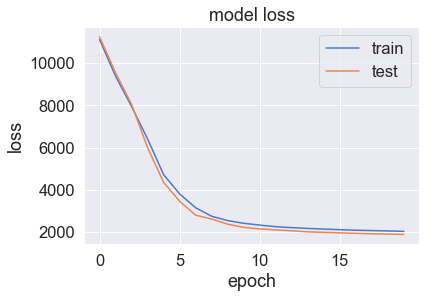

In [7]:
# create model
K.clear_session()
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(100, activation='sigmoid', input_dim=10, kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(Dense(50, activation='sigmoid', input_dim=10, kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(Dense(1, kernel_regularizer=keras.regularizers.l2(0.01)))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='Adadelta')
    return model

# Compile model
estimator = KerasClassifier(build_fn=baseline_model)

######################
### normalize data ###
######################

yy = (df['target'] - df['target'].mean()) / df['target'].std()

scaler = StandardScaler()
scaler.fit(df.drop(['target'], axis=1))
XX = scaler.transform(df.drop(['target'], axis=1))

#####################
### fit the model ###
#####################

history = estimator.fit(XX, yy, validation_split=0.3, epochs=20, batch_size=2, verbose=1)

#####################
### plot history ###
#####################

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()